# What is the most profitable region for the store ?

### Methodology

1. Group by data by Region
2. Calculate Profit sum of each region
3. Sort ascending (Visualization purposes)
4. Plot final findings

## Import Libraris and Data

In [12]:
# Importing libraris ill use
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
import humanize


# TODO : Loading the data
data = pd.read_csv('data/superstore.csv' , encoding='latin1')

## Data Cleaning

In [13]:

# TODO : Data Cleaning Phase + managing types
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

col_to_categorize = ['Ship Mode' , 'Sub-Category' , 'Category' , 'Region' , 'Segment' , 'State']
for col in col_to_categorize:
    data[col] = data[col].astype('category')

# Treat duplicate rows
duplicated_sum = data.duplicated().sum()
if duplicated_sum > 0 :
    data.drop_duplicates(inplace=True)

most_occurent_ship_mode = data['Ship Mode'].mode()[0]
most_occurent_segment = data['Segment'].mode()[0]

data['Ship Mode'] = data['Ship Mode'].fillna(most_occurent_ship_mode)
data['Segment'] = data['Segment'].fillna(most_occurent_segment)

# Check if any discounts higher then 1
discount_higher_then_01 = (data['Discount'] > 1).sum()
if discount_higher_then_01 >= 1:
    print("Discount Higher then 1 founded and fixed")
    data['Discount'] = np.where(data['Discount'] > 1 , data['Discount'].median() , data['Discount'])


Discount Higher then 1 founded and fixed


## Engineering Features

In [14]:
# TODO : Engineering features
months = list(calendar.month_name)[1:]
data['Year'] = data['Order Date'].dt.strftime("%Y")
data['Month'] = data['Order Date'].dt.strftime("%B")
# Convert Month column to an ordered categorical type
data['Month'] = pd.Categorical(data['Month'] , categories=months , ordered=True)
data.set_index("Row ID" , inplace=True)


# Sort Columns
data.sort_values(by='Year' , ascending=False , inplace=True)

## The Analysis

Grouped the data by `Region` focusing on Profit column and summing the profits per region , and then i renamed the column from `Profit` to 
`Total Profit` for readability , i rounded the value to the nearest integer and then changed the type for `int` , and finally sorted the values in descending order.

In [15]:
most_profitable_regions = data.groupby('Region' , observed=False)[[ 'Profit']].sum()
most_profitable_regions.rename(columns={'Profit':'Total Profit'} , inplace=True)
most_profitable_regions['Total Profit'] = round(most_profitable_regions['Total Profit']).astype(int)
most_profitable_regions.sort_values(by='Total Profit' , ascending=False , inplace=True)
most_profitable_regions

,Total Profit
Region,
West,108491
East,91523
South,46749
Central,39706


## Plotting

Created a bar chart for the most profitable regions in the store , displaying the total profit of each one

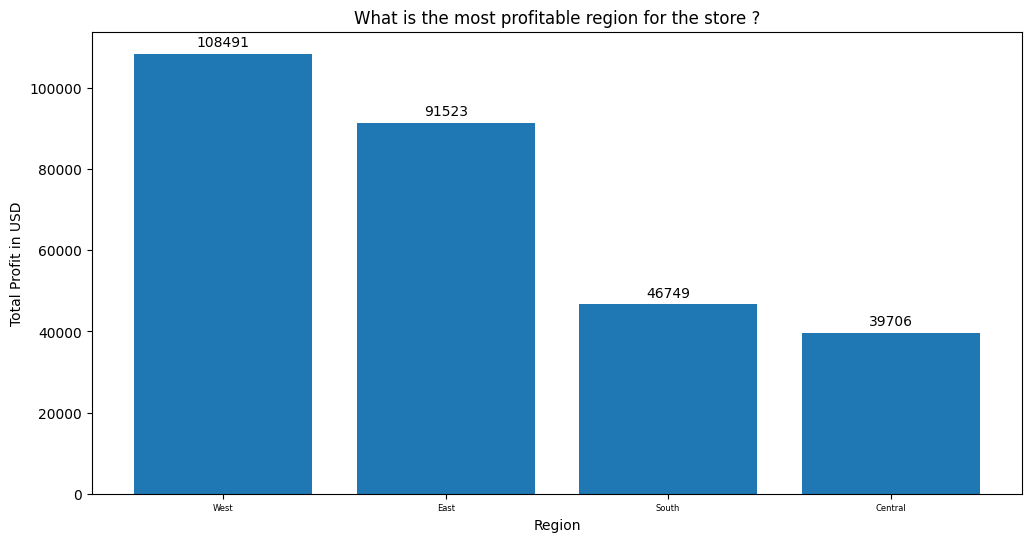

In [18]:
plt.figure(figsize=(12,6))
most_profitable_regions_bars = plt.bar(most_profitable_regions.index , most_profitable_regions['Total Profit'])
plt.bar_label(most_profitable_regions_bars , label_type='edge' , padding=3)
plt.xticks(fontsize=6)
plt.xlabel("Region")
plt.ylabel("Total Profit in USD")
plt.title("What is the most profitable region for the store ?")
plt.show()